In [4]:
import torch
import torchvision

model = torchvision.models.resnet50(weights='DEFAULT')
# model = torchvision.models.resn



Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/zx/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:51<00:00, 1.99MB/s]  


In [ ]:
# %%
try:
    import breaching
except ModuleNotFoundError:
    # You only really need this safety net if you want to run these notebooks directly in the examples directory
    # Don't worry about this if you installed the package or moved the notebook to the main directory.
    import os; os.chdir("/home/zx/Gitrepo/breaching")
    import breaching
    
import torch


# Redirects logs directly into the jupyter notebook
import logging, sys
logging.basicConfig(level=logging.INFO, handlers=[logging.StreamHandler(sys.stdout)], format='%(message)s')
logger = logging.getLogger()


cfg = breaching.get_config(overrides=["attack=hybrid_ac", "case=1_single_image_small", "case.model=cnn6"])
          
device = torch.device('cuda:7')
torch.backends.cudnn.benchmark = cfg.case.impl.benchmark
setup = dict(device=device, dtype=getattr(torch, cfg.case.impl.dtype))
setup
# %%
# print(cfg)
cfg.case.user.user_idx = 1

cfg.case.user.num_data_points = 1 # The attack is designed for only one data point
cfg.attack.optim.max_iterations = 24_000


user, server, model, loss_fn = breaching.cases.construct_case(cfg.case, setup)
# server.loss = torch.jit.script(torch.nn.MSELoss())
attacker = breaching.attacks.prepare_attack(server.model, server.loss, cfg.attack, setup)
# breaching.utils.overview(server, user, attacker)

server_payload = server.distribute_payload()
shared_data, true_user_data = user.compute_local_updates(server_payload)
# %%

user.plot(true_user_data)



# %%
reconstructed_user_data, stats = attacker.reconstruct(server_payload, shared_data, {}, dryrun=cfg.dryrun)

# # %% [markdown]
# # Next we'll evaluate metrics, comparing the `reconstructed_user_data` to the `true_user_data`.

# # %%
# metrics = breaching.analysis.report(reconstructed_user_data, true_user_data, [server_payload], 
#                                     server.model, order_batch=True, compute_full_iip=False, 
#                                     cfg_case=cfg.case, setup=setup)

## %%


# user.plot(true_user_data)



 # %%

user.plot(reconstructed_user_data)


# # %%
# print(cfg.case.user.user_type)


# %%

# type(server.loss)

In [ ]:

import torch, torchvision
img_tensor = torch.randn((1, 3, 224, 224))
dm, ds = torch.tensor([0,0,0]), torch.tensor([1,1,1])
for  i, img in enumerate(img_tensor):
    img = torch.clamp(img * ds + dm, 0, 1) 
    print(img.shape)
    img = torchvision.transforms.ToPILImage()(img)


In [12]:
import numpy as np
dm = torch.randn((1,1,1,3))
dataset_mean = np.array([0,0,0]) 
print(len(dataset_mean.shape))
dm = torch.as_tensor(dataset_mean)[None, :, None, None]
dm.shape

1


torch.Size([1, 3, 1, 1])

In [32]:
a = torch.tensor([1,2,3,4,5,6]).to(torch.float32)
a.requires_grad = True
b = a*2
c = torch.topk(b, k=4).values
d = c*2
d.sum().backward()
a.grad


tensor([0., 0., 4., 4., 4., 4.])

In [3]:
import torch
a = torch.tensor([[1,2,3], [4,5,6],[1,2,3]])
len(a.shape)

2

In [81]:
a = torch.randn((3, 4))
b = torch.topk(a, k=2, dim=-2)


c = torch.randn((3, 4))
d = torch.topk(c, k=2, dim=-1)

# print(d.indices.shape)

# dim1 = torch.tensor([i for i in range(3)])[:, None, None, None]
# dim2 = torch.tensor([i for i in range(4)])[None, :, None, None]
# dim3 = torch.tensor([i for i in range(5)])[None, None, :, None]
# dim2 = [[i] for i in range(4)]
# dim3 = [[i] for i in range(5)]

# c[dim1, dim2, dim3, d.indices]
# e = [b, d]
# print(c)
print(d.values)
print(d.indices)
# print(c[[[i] for i in range(len(c))], d.indices])
# # print(c[:, d.indices])

# # torch.index_select(c, 1 ,d.indices)

# row = [[i] for i in range(3)]
# row

dim0 = [[i] for i in range(3)]
print(dim0)
c[[[i] for i in range(3)], d.indices]

tensor([[1.2205, 0.4207],
        [1.4067, 0.1869],
        [1.6036, 0.2843]])
tensor([[2, 1],
        [1, 2],
        [3, 2]])
[[0], [1], [2]]


tensor([[1.2205, 0.4207],
        [1.4067, 0.1869],
        [1.6036, 0.2843]])

In [10]:
import torch
import math
gradient= [torch.randn((3,4))]
gradient_data = [torch.randn((3,4))]


top_10 = [torch.topk(grad, k=math.ceil(0.1*grad.shape[-1])) for grad in gradient]
gradient_top, gradient_data_top = [], []
gradient = [item.values for item in top_10] 


for i, item in enumerate(top_10) :
    gradient_top.append(item.values)
    
    dims = len(gradient_data[i].shape)
    if dims == 1:
        print(item.indices)
        gradient_data_top.append(gradient_data[i][item.indices])
    elif dims == 2:
        dim0 = [[i] for i in range(gradient_data[i].shape[0])] 
        gradient_data_top.append(gradient_data[dim0, item.indices])
    elif dims == 4:
        dim0 = torch.tensor([i for i in range(gradient_data[i].shape[0])])[:, None, None, None]
        dim1 = torch.tensor([i for i in range(gradient_data[i].shape[1])])[None, :, None, None]
        dim2 = torch.tensor([i for i in range(gradient_data[i].shape[2])])[None, None, :, None]

        gradient_data_top.append(gradient_data[dim0, dim1, dim2, item.indices])

        
print(gradient_top)
print(gradient_data_top)

tensor([4])
[tensor([5])]
[tensor([5])]


In [5]:

dim0 = torch.tensor([i for i in range(3)])[:, None]
dim0

tensor([[0],
        [1],
        [2]])

In [1]:
import time
import torch

data = torch.rand(2000000, dtype=torch.float32, device=torch.device('cuda:0'))
num_topk = 1000

def topk1():
    return data.topk(num_topk, sorted=False)

def topk2():
    sort, idx = data.sort(descending=True)
    return sort[:num_topk], idx[:num_topk]

def benchmark(f, iter, warmup):
    for k in range(warmup): f()
    start = time.perf_counter()
    for k in range(iter): f()
    torch.cuda.synchronize()
    return time.perf_counter() - start

print(benchmark(topk1, 100, 3))
print(benchmark(topk2, 100, 3))
print(benchmark(topk1, 100, 3))
print(benchmark(topk2, 100, 3))

/home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0.044236459070816636
0.04339598794467747
0.04433779907412827
0.0436536509077996


In [21]:

import torch
device = torch.device('cuda:7')
candidate = torch.randn((1, 3, 224, 224)).to(device)
noise = torch.randn_like(candidate).to(device)
betas = torch.linspace(0,10,10)*0.1

for i in reversed(betas):
    candidate.add(noise * betas[i])
    # print(candidate)
    # # print(i.device, candidate.device)
    # # print(candidate)

print(candidate.grad_fn)



None


In [36]:
import torch
import math

def gradient_sparse(gradient, gradient_data, scale=0.1):

    top_10 = [torch.topk(grad, k=math.ceil(0.01*grad.shape[-1])) for grad in gradient]
    gradient_top, gradient_data_top = [], []


    for i, item in enumerate(top_10) :
        gradient_top.append(item.values)
        
        dims = len(gradient_data[i].shape)
        if dims == 1:
            gradient_data_top.append(gradient_data[i][item.indices])
        elif dims == 2:
            dim0 = [[i] for i in range(gradient_data[i].shape[0])] 
            gradient_data_top.append(gradient_data[i][dim0, item.indices])
        elif dims == 4:
            dim0 = torch.tensor([i for i in range(gradient_data[i].shape[0])])[:, None, None, None]
            dim1 = torch.tensor([i for i in range(gradient_data[i].shape[1])])[None, :, None, None]
            dim2 = torch.tensor([i for i in range(gradient_data[i].shape[2])])[None, None, :, None]

            gradient_data_top.append(gradient_data[i][dim0, dim1, dim2, item.indices])

    return gradient_top, gradient_data_top

def calculate_float(tensor):
    acc = 1
    for data in tensor:
        acc *= data
    return acc


grad_dict = torch.load('/home/zx/Gitrepo/breaching/grad_dict')
gradient_values = [value for key, value in grad_dict.items()]


# mangiuade = {key:abs(1 - (value*value).sum()/value.pow(2).sum()) for key, value in grad_dict.items()}

# reversed(torch.argsort(torch.tensor(list(mangiuade.values()))))


# for rec, data in zip(gradient_rec, gradient_data):
#     scalar_product += (rec * data).sum()
#     rec_norm += rec.pow(2).sum()
#     data_norm += data.pow(2).sum()

In [32]:
## compute the parameter number ratio of layers
top_10, indices_top_10 = gradient_sparse(gradient_values, gradient_values)

float_top, float_grad = [], []
for grad in gradient_values:
    float_grad.append(calculate_float(grad.shape))

ratios = []
for i in range(len(gradient_values)):
# for i in range(51):
    float_top = []
    for top in gradient_values[:i]:
        float_top.append(calculate_float(top.shape))

    ratio = torch.sum(torch.tensor(float_top)) / torch.sum(torch.tensor(float_grad))
    ratios.append(ratio)

ratios

[tensor(0.),
 tensor(0.0008),
 tensor(0.0008),
 tensor(0.0008),
 tensor(0.0041),
 tensor(0.0041),
 tensor(0.0041),
 tensor(0.0073),
 tensor(0.0073),
 tensor(0.0073),
 tensor(0.0106),
 tensor(0.0106),
 tensor(0.0106),
 tensor(0.0138),
 tensor(0.0138),
 tensor(0.0138),
 tensor(0.0203),
 tensor(0.0203),
 tensor(0.0203),
 tensor(0.0333),
 tensor(0.0333),
 tensor(0.0333),
 tensor(0.0340),
 tensor(0.0341),
 tensor(0.0341),
 tensor(0.0470),
 tensor(0.0470),
 tensor(0.0470),
 tensor(0.0600),
 tensor(0.0600),
 tensor(0.0600),
 tensor(0.0859),
 tensor(0.0860),
 tensor(0.0860),
 tensor(0.1378),
 tensor(0.1378),
 tensor(0.1379),
 tensor(0.1407),
 tensor(0.1408),
 tensor(0.1408),
 tensor(0.1926),
 tensor(0.1926),
 tensor(0.1927),
 tensor(0.2445),
 tensor(0.2445),
 tensor(0.2445),
 tensor(0.3482),
 tensor(0.3482),
 tensor(0.3483),
 tensor(0.5556),
 tensor(0.5556),
 tensor(0.5557),
 tensor(0.5672),
 tensor(0.5672),
 tensor(0.5673),
 tensor(0.7746),
 tensor(0.7747),
 tensor(0.7747),
 tensor(0.9820),
 

In [42]:
float_all = []
for grad in gradient_values:
    float_all.append(calculate_float(grad.shape))

floats = torch.sum(torch.tensor(float_grad))

ratios = []
for layer_grad in gradient_values:
    float_layer = calculate_float(layer_grad.shape)
    ratio = float_layer / floats
    ratios.append(ratio)

# ratios
layer_weights = []
for i in range(len(gradient_values)):
    if i<20:
        layer_weights.append(1/2)
    elif i<40:
        layer_weights.append(1/4)
    else:
        layer_weights.append(1/8)
layer_weights
# layer_weights = [1 for i in range(len(gradient_values))]
# layer_weights = torch.linspace()

# gradient_values_weight = [weight * value for weight, value in zip(layer_weights, gradient_values)]
# gradient_values_weight

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125]

In [8]:
class test():
    # def __init__(self) -> None:
        # self.current_iteration = 0
    def print_iter(self):
        print(self.current_iteration)

    def test(self):
        a = [1,2,3,4,5]
        for self.current_iteration in a:
            # print(self.current_iteration)
            # print('123')
            self.print_iter()

t = test()
t.test()

1
2
3
4
5


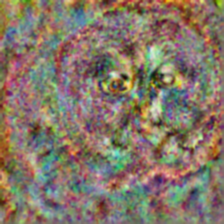

In [11]:
import torch
import torchvision
import PIL
gaussian_blur = torchvision.transforms.GaussianBlur(kernel_size=5)
image_path = '/home/zx/Gitrepo/breaching/out/optimization_IG_imgs_noise_5000None/1200_0.png'
image = torchvision.io.read_image(image_path)
img = gaussian_blur(image)
pil_img = torchvision.transforms.ToPILImage()(img)
pil_img.show()

In [13]:
a = torch.tensor([1,3,4])
b = torch.tensor([7,3,0])
# a.add_(-1*a).add_(b)
a.copy_(b)


tensor([7, 3, 0])

In [7]:
from torchvision import transforms
import torch
mean, std = (0.485, 0.456, 0.406), (0.229, 0.224, 0.225)

# torchvision.transforms.Normalize(mean, std).__repr__()

grad_dict = torch.load('/home/zx/Gitrepo/breaching/grad_dict')
grad_shape = [v.shape for v in grad_dict.values()]
grad_shape


[torch.Size([64, 3, 7, 7]),
 torch.Size([64]),
 torch.Size([64]),
 torch.Size([64, 64, 3, 3]),
 torch.Size([64]),
 torch.Size([64]),
 torch.Size([64, 64, 3, 3]),
 torch.Size([64]),
 torch.Size([64]),
 torch.Size([64, 64, 3, 3]),
 torch.Size([64]),
 torch.Size([64]),
 torch.Size([64, 64, 3, 3]),
 torch.Size([64]),
 torch.Size([64]),
 torch.Size([128, 64, 3, 3]),
 torch.Size([128]),
 torch.Size([128]),
 torch.Size([128, 128, 3, 3]),
 torch.Size([128]),
 torch.Size([128]),
 torch.Size([128, 64, 1, 1]),
 torch.Size([128]),
 torch.Size([128]),
 torch.Size([128, 128, 3, 3]),
 torch.Size([128]),
 torch.Size([128]),
 torch.Size([128, 128, 3, 3]),
 torch.Size([128]),
 torch.Size([128]),
 torch.Size([256, 128, 3, 3]),
 torch.Size([256]),
 torch.Size([256]),
 torch.Size([256, 256, 3, 3]),
 torch.Size([256]),
 torch.Size([256]),
 torch.Size([256, 128, 1, 1]),
 torch.Size([256]),
 torch.Size([256]),
 torch.Size([256, 256, 3, 3]),
 torch.Size([256]),
 torch.Size([256]),
 torch.Size([256, 256, 3, 3])

In [ ]:
import torch
import torchvision
import PIL
from PIL import Image

# img  = Image.open('/home/zx/Gitrepo/breaching/out/optimization_IG_imgs_noise_cosin_5000_None/4500_0.png')
# torchvision.transforms.ToTensor()(img)


grad_dict = torch.load('/home/zx/Gitrepo/breaching/grad_dict')
# gradient_values = [value for key, value in grad_dict.items()]
grad_dict


def grad_fn(model, img, label, loss_fn):
   return torch.autograd.grad(loss_fn(model(img), label), model.parameters())
    # pass

def grad_sensitive(model, img, loss_fn, label, transforms, compare_fn):
    # calculate the orignal gradient
    base_grad = grad_fn(model, img, label, loss_fn)

    # calculate the graddient from transformed images
    if not isinstance(transforms, list):
        transforms = [transforms]

    transformed_layers_sensitive = []
    for transform in transforms:
        transformed_img = transform(img)

        transformed_grad = grad_fn(model, transformed_grad, label)
    
        # calculate the l2 norm for each layer, not cnosider the orginal mantiguade of gradient tensor
        distances = []
        for base, trans in zip(base_grad, transformed_grad):
            distances.append(compare_fn(base, trans)) 

        transformed_layers_sensitive.append({transform.__repr__():distances}) 
    return transformed_layers_sensitive


model = torchvision.models.resnet18()
loss_fn = torch.nn.CrossEntropyLoss()
label = 24

img  = Image.open('/home/zx/Gitrepo/breaching/out/optimization_IG_imgs_noise_cosin_5000_None/4500_0.png')
img = torchvision.transforms.ToTensor()(img)

transforms = [torchvision.transforms.RandomHorizontalFlip()]

compare_fn = torch.nn.MSELoss()
grad_sensitive(model, img, loss_fn, label, transforms, compare_fn)



In [ ]:
from typing import List
import torch
@torch.jit.script
def _cosine_sim(gradient_rec: List[torch.Tensor], gradient_data: List[torch.Tensor]):
    scalar_product = gradient_rec[0].new_zeros(1,)
    rec_norm = gradient_rec[0].new_zeros(1,)
    data_norm = gradient_rec[0].new_zeros(1,)

    objectives = []
    for rec, data in zip( gradient_rec, gradient_data):
        # mask = data.abs() > 1e-6 
        scalar_product = (rec * data).sum().abs()
        rec_norm = rec.pow(2).sum()
        data_norm = data.pow(2).sum()

        # print('------------------------\n', scalar_product, rec_norm.sqrt(), data_norm.sqrt())
        objective =  scalar_product / ((rec_norm.sqrt() * data_norm.sqrt()) + 1e-6)
        objectives.append(objective)
    return objectives

rec = [torch.randn((64,64, 3,3), requires_grad=True), torch.randn((64,64, 3,3), requires_grad=True)]
data = [torch.randn((64,64, 3,3), requires_grad=True), torch.randn((64,64, 3,3), requires_grad=True)]

out = _cosine_sim(rec, data)
out_sum = torch.sum(torch.tensor(out))
out_sum = sum(out)
out_sum.backward()
# out.backward()
rec[0].grad

In [4]:
from unittest.mock import patch
import numpy as np
import torch
import threading
from multiprocessing import Pool, pool
import subprocess
pattern = 2
# x_len, y_len = h//pattern, w//pattern
# for x_idx in range(x_len):
#     for y_idx in range(y_len):
#         a[:, 0, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern] = x_idx + y_idx + 0
#         a[:, 1, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern] = x_idx + y_idx + 1   
#         a[:, 2, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern] = x_idx + y_idx + 2   

# print(a)

# pattern = 4

def patch_grad(grad, pattern , x_idx, y_idx):
    grad[:, :, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern].copy_(torch.mean(grad[:, :, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern], dim=(2,3), keepdim=True))   


import time

def compute_time(pattern=16):
    a = torch.ones((1, 3, 224,224))
    b, c, h, w = a.shape
    x_len, y_len = h//pattern, w//pattern
    st_time = time.time()
    for i in range(100):
        for x_idx in range(x_len):
            for y_idx in range(y_len):
                a[:, :, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern].copy_(torch.mean(a[:, :, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern], dim=(2,3), keepdim=True))   
    c_time = time.time() - st_time
    return c_time
def compute_time_thread(pattern=16):
    a = torch.ones((1, 3, 224,224))
    b, c, h, w = a.shape
    x_len, y_len = h//pattern, w//pattern
    st_time = time.time()
    for i in range(100):
        threads = []
        for x_idx in range(x_len):
            for y_idx in range(y_len):
                thread = threading.Thread(target=patch_grad, args=(a, pattern, x_idx, y_idx))
                threads.append(thread)
        


        for thread in threads:
            thread.start()
        
        for thread in threads:
            thread.join()
                # a[:, :, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern].copy_(torch.mean(a[:, :, x_idx*pattern:(x_idx+1)*pattern, y_idx*pattern:(y_idx+1)*pattern], dim=(2,3), keepdim=True))   
    c_time = time.time() - st_time
    return c_time
        
def compute_time_process(pattern=16):
    a = torch.ones((1, 3, 224,224))
    b, c, h, w = a.shape
    x_len, y_len = h//pattern, w//pattern
    st_time = time.time()
    for i in range(100):
        pool = Pool(x_len*y_len)
        args = []
        for x_idx in range(x_len):
            for y_idx in range(y_len):
                args.append((a, pattern, x_idx, y_idx))
        pool.starmap(patch_grad, iterable=args)
        pool.close()
        pool.join()
        

    c_time = time.time() - st_time
    return c_time
# print('time pattern 16', compute_time(16))
# print('time pattern 16 thread', compute_time_process(16))
# print('time pattern 8', compute_time(8))
print('time pattern 4', compute_time(4))
# print('time pattern 2', compute_time(2))
# print('time pattern 1', compute_time(1))

# pattern = 4
# # grad =  torch.ones((1, 3, 224,224))
# st_time = time.time()
# for i in range(100):
#     grad =  torch.ones((1, 3, 224,224))
#     grad_reshpae = grad.reshape((1,-1, pattern, pattern))
#     grad_reshpae.copy_(torch.mean(grad_reshpae, dim=(2,3), keepdim=True))
# time.time() - st_time



time pattern 4 12.050640344619751


## Read the benchmark table

In [2]:
from curses.ascii import isdigit
import pandas as pd

metric_key = ['mse', 'psnr', 'lpips', 'rpsnr', 'ssim', 'max_ssim', 'max_rpsnr', 'IIP-pixel', 'IIP-lpips', 'IIP-self', 'feat_mse', 'parameters']
metric_key = ['mse', 'psnr', 'lpips', 'rpsnr', 'ssim', 'IIP-pixel', 'IIP-lpips', 'IIP-self']

def get_metric_from_table(tb_path, metric_key):
    data = pd.read_csv(tb_path)


    rows = [row for idx, row in data.iterrows()]
    cols = [col for col in data.columns]


    get_value_list = lambda row: row.name[0].split('\t')
    get_key_list = lambda cols: cols[0].split('\t')


    key = get_key_list(cols)
    metric_key_idx = [key.index(k) for k in metric_key]

    metric_list = []
    for row in rows:
        value = get_value_list(row)
        metric_list.append([float(value[idx]) for idx in metric_key_idx])

    df = pd.DataFrame(metric_list, columns=metric_key) 

    return df



def get_statistic(df, keys):
    result = ''
    for key in keys:
        result += f'{key}:{df[key].mean():.4f} '
    return result

modern_origin_tb_path = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-30/imgnet_resnet18_modern_init_pattern4_pattern_None_5000/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv'
modern_patch_tb_path = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-30/imgnet_resnet18_modern_init_zero_pattern_4_5000/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv'

origin_modern_df = get_metric_from_table(tb_path=modern_origin_tb_path, metric_key=metric_key)
patch_modern_df = get_metric_from_table(tb_path=modern_patch_tb_path, metric_key=metric_key)

# print(origin_modern_df['lpips'])
print(get_statistic(origin_modern_df, metric_key))
# print(get_statistic(patch_modern_df, metric_key))



invert_origin_tb_path = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-31/imgnet_resnet18_invert_init_zeros_pattern_None_5000/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 
invert_patched_tb_path = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-31/imgnet_resnet18_invert_init_zeros_pattern_4_5000/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 

origin_df = get_metric_from_table(tb_path=invert_origin_tb_path, metric_key=metric_key)
patch_df = get_metric_from_table(tb_path=invert_patched_tb_path, metric_key=metric_key)

# print('---------------------------')
# # print(origin_df['lpips'])
# print(get_statistic(origin_df, metric_key))
# print(get_statistic(patch_df, metric_key))

# print(origin_invert_df)
# print(origin_invert_df['lpips'])
# print(patch_invert_df['lpips'])



invert_origin_tb_path_restart4 = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-31/imgnet_resnet18_invert_init_zeros_pattern_None_5000_restart_4/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 
invert_patched_tb_path_restart4 = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-31/imgnet_resnet18_invert_init_zeros_pattern_4_5000_restart_4/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 

origin_df = get_metric_from_table(tb_path=invert_origin_tb_path_restart4, metric_key=metric_key)
patch_df = get_metric_from_table(tb_path=invert_patched_tb_path_restart4, metric_key=metric_key)


# print(origin_df['lpips'])
# print(get_statistic(origin_df, metric_key))
# print(get_statistic(patch_df, metric_key))
# print('---------------------------')

modern_origin_tb_path_restart4 = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-31/imgnet_resnet18_modern_init_pattern4_pattern_None_5000_restart_4/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 
modern_patched_tb_path_restart4 = '/home/zx/Gitrepo/breaching/outputs/default/2022-08-31/imgnet_resnet18_modern_init_zeros_pattern_4_5000_restart_4/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 

origin_df = get_metric_from_table(tb_path=modern_origin_tb_path_restart4, metric_key=metric_key)
patch_df = get_metric_from_table(tb_path=modern_patched_tb_path_restart4, metric_key=metric_key)
# # print(origin_df.shape)

# print(get_statistic(origin_df, metric_key))
# print(get_statistic(patch_df, metric_key))





invert_resnet18 = '/home/zx/Gitrepo/breaching/outputs/single_imagenet_resnet18_invertinggradients_zeros_pattern_None_5000_1/2022-09-02/04-49-03/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 
invert_resnet50 = '/home/zx/Gitrepo/breaching/outputs/single_imagenet_resnet50_invertinggradients_zeros_pattern_None_5000_1/2022-09-02/02-29-12/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 
invert_resnet152 = '/home/zx/Gitrepo/breaching/outputs/single_imagenet_resnet152_invertinggradients_zeros_pattern_None_5000_1/2022-09-02/02-31-04/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv' 

# invert_18_df = get_metric_from_table(tb_path=invert_resnet18, metric_key=metric_key)
# invert_resnet50_df = get_metric_from_table(tb_path=invert_resnet50, metric_key=metric_key)
# invert_resnet152_df = get_metric_from_table(tb_path=invert_resnet152, metric_key=metric_key)

# print(get_statistic(invert_18_df, metric_key))
# print(get_statistic(invert_resnet50_df, metric_key))
# print(get_statistic(invert_resnet152_df, metric_key))

# see_resnet50 = '/home/zx/Gitrepo/breaching/outputs/default/2022-09-02/01-12-22/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv'
# see_50_df = get_metric_from_table(tb_path=see_resnet50, metric_key=metric_key)
# print(get_statistic(see_50_df, metric_key))

# see_resnet50_fault = '/home/zx/Gitrepo/breaching/outputs/default/2022-09-01/11-29-46/tables/table_breach_single_imagenet_ImageNetAnimals_reports.csv'
# see_50_df = get_metric_from_table(tb_path=see_resnet50_fault, metric_key=metric_key)
# print(get_statistic(see_50_df, metric_key))


mse:0.0960 psnr:10.6206 lpips:0.6457 rpsnr:11.1493 ssim:0.3150 IIP-pixel:0.0000 IIP-lpips:0.1569 IIP-self:1.0000 


## show image dynamic range

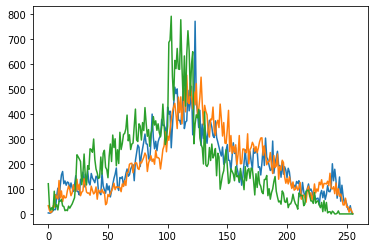

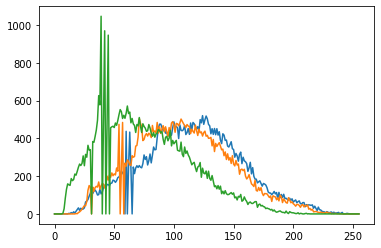

In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

path_recover = '/home/zx/Gitrepo/breaching/out/patched/24_candidate_pattern_4_decay_init_zeros_sparse_None/3700_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patched/24_candidate_pattern_4_decay_init_zeros_sparse_None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/gradient_sparese/optimization_IG_imgs_noise_5000None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patch_compare/4_candidate_pattern_4_decay_init_zeros_sparse_None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patch_compare/5_pattern_None_decay_init_zeros_sparse_None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patch_compare/6_pattern_None_decay_init_zeros_sparse_None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patch_compare/7_pattern_None_decay_init_zeros_sparse_None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patch_compare/8_pattern_None_decay_init_zeros_sparse_None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patch_compare/9_candidate_pattern_4_decay_init_zeros_sparse_None/4999_0.png'
path_recover = '/home/zx/Gitrepo/breaching/out/patch_compare/11_pattern_None_decay_init_zeros_sparse_None/4999_0.png'
path_origin = '/home/zx/Gitrepo/breaching/out/imagenet_origin_24.png'
def draw_dynamic_range(path):

    img = Image.open(path)
    img_array = np.array(img)

    channel_list = []
    for c in range(img_array.shape[2]):
        count = [0 for i in range(256)]
        img_c = img_array[:, :, c]
        for value in img_c.flatten():
            count[value] += 1
        channel_list.append(count)
    channel_list

    for c_list in channel_list:
        plt.plot(range(256) , c_list)
    plt.show()

draw_dynamic_range(path_recover)
draw_dynamic_range(path_origin)

## Plot PSNR - Iteration Figure

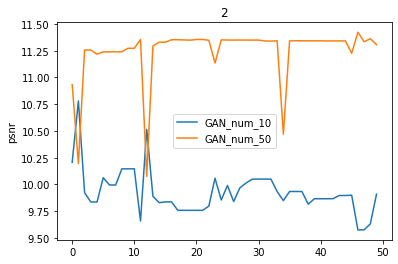

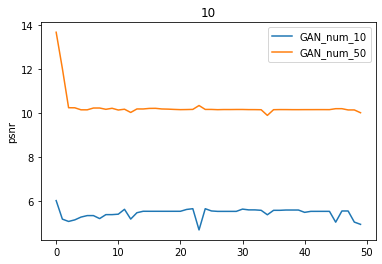

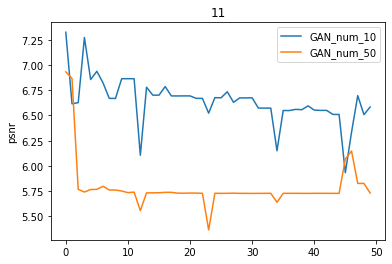

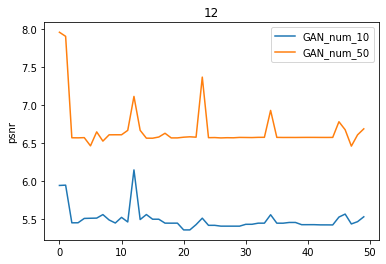

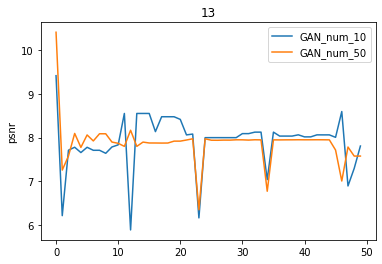

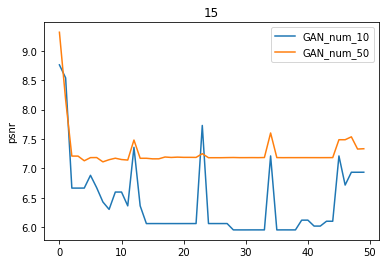

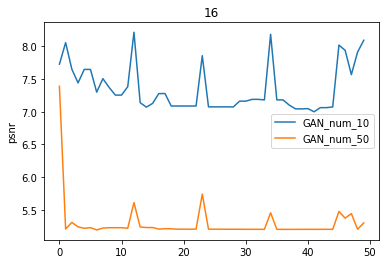

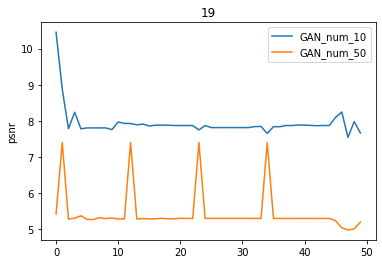

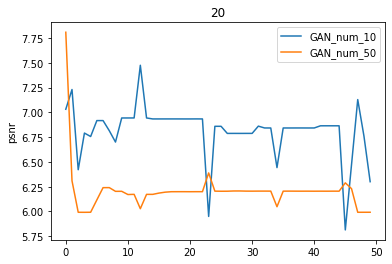

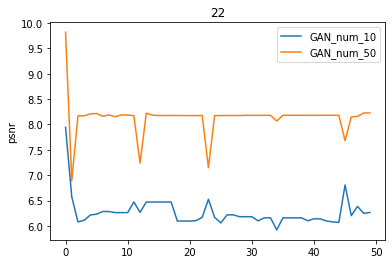

In [10]:
## obtian reconstruction image from dir
import utils_img
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import lpips
import torchvision, torch
import os

def draw_metric(method='psnr',reconstructed_imgs_path=None, origin_imgs_path=None, label=''):

    ori_img = np.array(Image.open(origin_imgs_path))
    metric_list = []

    if method == 'lpips':
        loss_fn = lpips.LPIPS(net='alex')
        
    for img_path in reconstructed_imgs_path:
        rec_img = np.array(Image.open(img_path))
        if method == 'psnr':
            metric_list.append(utils_img.calculate_psnr(ori_img, rec_img))       
        elif method == 'ssim':
            metric_list.append(utils_img.calculate_ssim(ori_img, rec_img))       
        elif method == 'lpips':
            ori_img_th = torchvision.io.read_image(origin_imgs_path).to(dtype=torch.float32)
            rec_img_th = torchvision.io.read_image(img_path).to(dtype=torch.float32)

            ori_img_th = (ori_img_th -128 )/128
            rec_img_th = (rec_img_th - 128) /128
            score = loss_fn(ori_img_th.unsqueeze(0), rec_img_th.unsqueeze(0)).detach().item()
            metric_list.append(score)
        elif method == 'mse':
            
            ori_img_th = torchvision.io.read_image(origin_imgs_path).to(dtype=torch.float32)
            rec_img_th = torchvision.io.read_image(img_path).to(dtype=torch.float32)

            mse_score = (ori_img_th - rec_img_th).pow(2).mean(dim=[1, 2, 3])
            avg_mse, max_mse = mse_score.mean().item(), mse_score.max().item()
            metric_list.append(avg_mse)
        else:
            raise NotImplementedError(f'The method of {method} not implemented yet.')
            
            
    # plt.figure()
    plt.plot(range(len(metric_list)), metric_list, label=label)
    plt.ylabel(method)
    # plt.legend(legend)

    

# reconstructed_imgs_path = utils_img.get_image_paths('/home/zx/Gitrepo/breaching/out/gradient_sparese/optimization_IG_imgs_noise_5000None', natsort=True)
# origin_imgs_path = '/home/zx/Gitrepo/breaching/out/ImageNet_origin/24.png'
# draw_metric(method='psnr', reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path)

# reconstructed_imgs_path =utils_img.get_image_paths('/home/zx/Gitrepo/breaching/out/denoise/24_pattern_None_decay_init_randn_denoise_swin_callback_5000_0.7_start_2000' )
# draw_metric(method='psnr', reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path)

# reconstructed_imgs_path =utils_img.get_image_paths('/home/zx/Gitrepo/breaching/out/denoise/24_pattern_None_decay_init_zeros_denoise_swin_callback_5000_start_2000' )
# draw_metric(method='psnr', reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path)


# reconstructed_imgs_path =utils_img.get_image_paths('/home/zx/Gitrepo/breaching/out/denoise/24_pattern_None_decay_init_randn_denoise_swin_callback_5000_0.9_start_2000')
# draw_metric(method='psnr', reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path)


# reconstructed_imgs_path =utils_img.get_image_paths('/home/zx/Gitrepo/breaching/out/denoise/24_pattern_None_decay_init_randn_denoise_swin_callback_5000_0.9_start_0' )
# draw_metric(method='psnr', reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path)

# reconstructed_imgs_path =utils_img.get_image_paths('/home/zx/data/GitRepo/breaching/out/base_line/24_model_resnet18_init_randn_iteration_5000_restart_4/0' )
# origin_imgs_path = '/home/zx/Gitrepo/breaching/out/ImageNet_origin/24.png'
# draw_metric(method='psnr', reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path)

# idxs = [2, 10, 11, 12, 13, 15, 16, 19, 20, 22]
# for idx in idxs:
#     reconstructed_imgs_path =utils_img.get_image_paths(f'/home/zx/data/GitRepo/breaching/out/psnr_plot/{idx}/0' )
#     origin_imgs_path = f'/home/zx/data/GitRepo/breaching/rec_datasets/normal/0/hq/{idx}.png'
#     draw_metric(method='psnr', reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path)


# attack from same class
method = 'psnr'
# if not os.path.exists(f'./fig/{method}'):
#     os.mkdir(f'./fig/{method}')
idxs = [2, 10, 11, 12, 13, 15, 16, 19, 20, 22]
for idx in idxs:
    plt.figure()
    origin_imgs_path = f'/home/zx/data/GitRepo/breaching/rec_datasets/normal/0/hq/{idx}.png'
    # reconstructed_imgs_path =utils_img.get_image_paths(f'/home/zx/data/GitRepo/breaching/out/psnr_plot/{idx}/0' )
    # draw_metric(method=method,reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path, label='random')

    # reconstructed_imgs_path =utils_img.get_image_paths(f'/home/zx/data/GitRepo/breaching/out/from_same_class/{idx}/0' )
    # draw_metric(method=method, reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path, label='same_class')

    gan_num_sample = 50
    reconstructed_imgs_path =utils_img.get_image_paths(f'/home/zx/data/GitRepo/breaching/out/GAN/CMA/num_10/{idx}')
    draw_metric(method=method, reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path, label='GAN_num_10')
    
    reconstructed_imgs_path =utils_img.get_image_paths(f'/home/zx/data/GitRepo/breaching/out/GAN/CMA/num_{gan_num_sample}/{idx}')
    draw_metric(method=method, reconstructed_imgs_path=reconstructed_imgs_path, origin_imgs_path=origin_imgs_path, label=f'GAN_num_{gan_num_sample}')
    
    plt.title(f'{idx}')
    plt.legend()
    # plt.savefig(f'./fig/num_{gan_num_sample}/{method}/{idx}.png')

In [32]:
from fileinput import filename
import re
import json

def get_losses_from_log(log_path):

    with open(log_path) as f:
        content = f.readlines()

    
    iter_num, r = 0, 0
    iter_loss = {}
    stack =[]
    for s in content:
        if 'Recovered labels' in s:
            iter_num = re.findall('Recovered labels \[(\d+)\] through strategy bias-corrected', s)
            stack.append(iter_num[0])
        if 'It: 1000' in s: 
            r = re.findall('([0-9]{1,}[.][0-9]*)', s)
            assert len(r) == 4, f'wrong match, exptected match length 4, but get length {len(r)} '
            iter_loss[int(stack.pop())] = [float(loss) for loss in r]

    return iter_loss


match_0_396 = get_losses_from_log('/home/zx/Gitrepo/breaching/outputs/single_imagenet_resnet18_optimization_SR_zeros_pattern_None_1000_1/2022-09-13/09-38-41/single_imagenet_resnet18_optimization_SR_zeros_pattern_None_1000_1_data_generate.log')
match_396_1000 = get_losses_from_log('/home/zx/Gitrepo/breaching/outputs/single_imagenet_resnet18_optimization_SR_zeros_pattern_None_1000_1/2022-09-14/01-46-37/single_imagenet_resnet18_optimization_SR_zeros_pattern_None_1000_1_data_generate.log')

match_0_396.update(match_396_1000) 

match_0_1000 = match_0_396

filenames = []
for k, v in match_0_1000.items():
    if v[1] <= 0.001:
        # print(k, v, idx)
        # idx += 1
        filenames.append(f'{k}.png')
    
import os
from pathlib import Path
dir_H = '/home/zx/data/GitRepo/KAIR-master/trainsets/trainH'
dir_L = '/home/zx/data/GitRepo/KAIR-master/trainsets/trainL'
def reverse_delete_files(dir, filenames):
    dir = Path(dir) 
    file_path = [i for i in dir.iterdir()]
    for path in file_path:
        if path.name not in filenames:
            # os.remove(file_path)
            print(path)
    
reverse_delete_files(dir=dir_H, filenames=filenames)
reverse_delete_files(dir=dir_L, filenames=filenames)


## load diffusion pickle

In [6]:
from tqdm import tqdm, trange
from time import sleep
import torch
import torch.nn.functional as F
import pickle
from pathlib import Path

#load pickle metric
diffusion_path = '/home/zx/data/GitRepo/breaching/out/diffusion'

metrics = {}
for subdir in Path(diffusion_path).iterdir():
    metric_path = subdir / 'metric.pkl'
    fh = open(metric_path.as_posix(), 'rb')
    metric = pickle.load(fh)
    metric["name"] = subdir.name 
    metrics[subdir.name] = metric
    
    

# with open("/home/zx/data/GitRepo/breaching/out/diffusion/class_cond_False_iteration_1_respacing_10/metric.pkl", 'rb') as f:
#     metric = pickle.load(f)


In [7]:
import csv
dict_data =list(metrics.values())
csv_columns = list(dict_data[0].keys())
# dict_data = [
# {'No': 1, 'Name': 'Alex', 'Country': 'India'},
# {'No': 2, 'Name': 'Ben', 'Country': 'USA'},
# {'No': 3, 'Name': 'Shri Ram', 'Country': 'India'},
# {'No': 4, 'Name': 'Smith', 'Country': 'USA'},
# {'No': 5, 'Name': 'Yuva Raj', 'Country': 'India'},
# ]
csv_file = "metrics_diffusion.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("I/O error")

## compute metrics given imgs

In [7]:
from pathlib import Path
import utils_img
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import lpips
import torchvision, torch
import os

def get_metric(reconstructed_img_path=None, origin_img_path=None):

    metric = {}

    ori_img = np.array(Image.open(origin_img_path))
    rec_img = np.array(Image.open(reconstructed_img_path))

    metric["ssim"] = utils_img.calculate_ssim(ori_img, rec_img)
    metric["psnr"] = utils_img.calculate_psnr(ori_img, rec_img)

    ori_img_th = torchvision.io.read_image(origin_img_path).to(dtype=torch.float32)
    rec_img_th = torchvision.io.read_image(reconstructed_img_path).to(dtype=torch.float32)

    lpips_scorer = lpips.LPIPS(net='alex')
    ori_img_th = (ori_img_th -128 )/128
    rec_img_th = (rec_img_th - 128) /128
    lpips_score = lpips_scorer(ori_img_th.clone().unsqueeze(0), rec_img_th.clone().unsqueeze(0)).detach().item()
    metric["lpips"] = lpips_score

    mse_score = (ori_img_th - rec_img_th).pow(2).mean(dim=[0, 1, 2])
    avg_mse, max_mse = mse_score.mean().item(), mse_score.max().item()
    metric["mse"] = avg_mse

    return metric


ori_dir = "/home/zx/data/GitRepo/breaching/rec_datasets/normal/0/hq"
rec_dir = "/home/zx/data/GitRepo/breaching/out/diffusion/benchmark/resize"

file_names = [i.name for i in Path(ori_dir).iterdir()][:100]

metric_list = []
for file_name in file_names:
    reconstructed_img_path = os.path.join(rec_dir, file_name)
    ori_img_path = os.path.join(ori_dir, file_name)

    metric = get_metric(reconstructed_img_path=reconstructed_img_path, origin_img_path=ori_img_path)
    metric["name"] = file_name

    metric_list.append(metric)
    # break

    

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packages/lpips/weights/v0.1/alex.pth
Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /home/zx/miniconda3/envs/torch1.12/lib/python3.10/site-packa

In [8]:
import csv
dict_data = metric_list
csv_columns = list(dict_data[0].keys())

csv_file = "baseline/diffusion_grad.csv"
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
    print("I/O error")


In [6]:
from PIL import Image
import os

rec_dir = "/home/zx/data/GitRepo/breaching/out/diffusion/benchmark"
save_dir =  "/home/zx/data/GitRepo/breaching/out/diffusion/benchmark/resize/" 
out_size = (224, 224)
for image in Path(rec_dir).iterdir():
    img = Image.open(image.as_posix())
    img = img.resize(out_size)
    img.save(os.path.join(save_dir, image.name))
    # print(img.size)
    # break
    

IsADirectoryError: [Errno 21] Is a directory: '/home/zx/data/GitRepo/breaching/out/diffusion/benchmark/resize'